# Reproduction of Fig. 6 of Armand 2020

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_10577/2426150513.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_10577/2426150513.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))


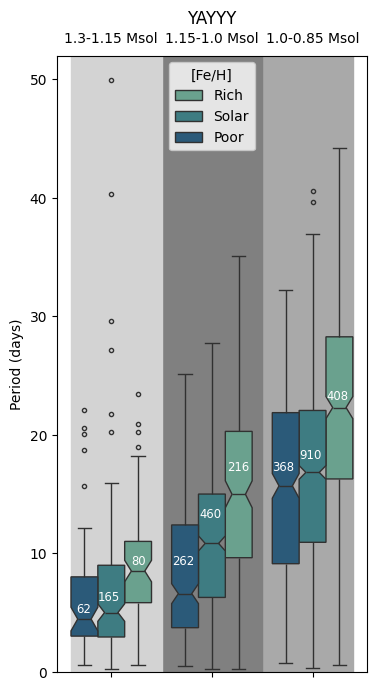

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', '[Fe/H]', 'Mass']].dropna()

massbins = pd.cut(data['Mass'], (0.85, 1.0, 1.15, 1.3), include_lowest=True).dropna()
massbins = pd.Series.dropna(massbins)
fehbins = pd.cut(data['[Fe/H]'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()

data = data.drop(['[Fe/H]', 'Mass'], axis=1)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)
data = data.merge(massbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['Mass', '[Fe/H]']).size().reset_index(name='counts')

plt.figure(figsize=(4,8))
ax = sns.boxplot(data=data, x='Mass', y='Prot', orient='v', hue='[Fe/H]', hue_order=('Rich', 'Solar', 'Poor'), palette='crest', fliersize=3, notch=True)

# plot info
ax.set_title('YAYYY')
ax.set_ylabel('Period (days)')
ax.set_xlabel('')
ax.set_ylim(0, 52)
ax.set_xticklabels(('1.0-0.85 Msol', '1.15-1.0 Msol', '1.3-1.15 Msol'))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# number of observations per box
ax.text(-0.14, 23, '408', size='small', color='w')
ax.text(0.13, 18, '910', size='small', color='w')
ax.text(0.4, 17, '368', size='small', color='w')
ax.text(0.85, 17, '216', size='small', color='w')
ax.text(1.12, 13, '460', size='small', color='w')
ax.text(1.4, 9, '262', size='small', color='w')
ax.text(1.8, 9, '80', size='small', color='w')
ax.text(2.14, 6, '165', size='small', color='w')
ax.text(2.35, 5, '62', size='small', color='w')

plt.savefig('metallicity.png')
plt.show()


![priii](usagi.webp "yaha")

# Period against Temperature Subdivided by Metallicity

          BP-G [Fe/H]  counts
0  0.329-0.399   Poor     791
1  0.329-0.399  Solar    1010
2  0.329-0.399   Rich     466
3  0.399-0.459   Poor     393
4  0.399-0.459  Solar     648
5  0.399-0.459   Rich     335
6   0.459-0.62   Poor     372
7   0.459-0.62  Solar     667
8   0.459-0.62   Rich     311


/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_10577/623243955.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['BP-G', '[Fe/H]']).size().reset_index(name='counts')


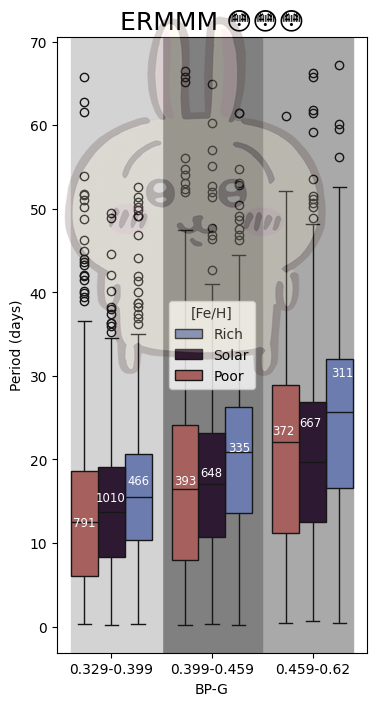

In [10]:
from PIL import Image

data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', 'BP-G', '[Fe/H]']].dropna()
fehbins = pd.cut(data['[Fe/H]'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['BP-G'], (0.329, 0.399, 0.459, 0.62), labels=('0.329-0.399', '0.399-0.459', '0.459-0.62'), include_lowest=True).dropna()

data = data.drop(['BP-G', '[Fe/H]'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['BP-G', '[Fe/H]']).size().reset_index(name='counts')
print(counts)

plt.figure(figsize=(4,8))
ax = sns.boxplot(data=data, x='BP-G', y='Prot', orient='v', order=('0.459-0.62', '0.399-0.459', '0.329-0.399'), 
                 hue='[Fe/H]', hue_order=('Rich', 'Solar', 'Poor'), palette='twilight')

# sets plot parameters
ax.set_title('ERMMM 😳😳😳', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('BP-G')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# counts number of observations
ax.text(-0.18, 30, '311', size='small', color='w')
ax.text(0.13, 24, '667', size='small', color='w')
ax.text(0.4, 23, '372', size='small', color='w')
ax.text(0.84, 21, '335', size='small', color='w')
ax.text(1.12, 18, '648', size='small', color='w')
ax.text(1.38, 17, '393', size='small', color='w')
ax.text(1.84, 17, '466', size='small', color='w')
ax.text(2.15, 15, '1010', size='small', color='w')
ax.text(2.38, 12, '791', size='small', color='w')

im = Image.open('usagi.png')
plt.figimage(im, 0, 315, alpha=0.2)

plt.savefig('prot_vs_color.png')
plt.show()

![priii](usagi.webp "yaha")

# Cross Reference w/ Gaia DR3 Metallicity Data 

In [11]:
import numpy as np

def read():
    '''
    Takes data from Armand et al. 2020 (Table 2; should be ~5.7 GB) and cross matches it with objects in result.csv
    to gauge accuracy of metallicity values in the latter
    '''

    # use np to ensure gaia ids rae 64-bit due to their large size
    y = np.genfromtxt('result.csv', dtype=np.float64, delimiter=',', usecols=(0,11))
    y = y[~np.isnan(y).any(axis=1)]
    y = pd.DataFrame(y)

    z = np.genfromtxt('table-2.csv', dtype=np.float64, delimiter=',', usecols=(0, 19))
    z = z[~np.isnan(z).any(axis=1)]
    z = pd.DataFrame(z)

    #df2 = pd.read_csv('table-2.csv')[['source_id', 'mh_xgboost']]

    result = pd.merge(y, z, left_on=0, right_on=0, how='inner')
    #result = result.drop('2', axis=1)

    result.to_csv('metallicitycompare.txt', sep=' ')

    return result

read()

#df = pd.read_csv('metallicitycompare.txt')
#for i, row in df.itertuples():
#    row = row.split()
#    print(f'{(float(row[2]) / float(row[3]) - 1) * 100:.3f}%')


,0,1_x,1_y
0,2.051787e+18,-0.073943,-0.749
1,2.052286e+18,-0.233642,-0.201
2,2.053089e+18,-0.334432,-0.336
3,2.053099e+18,-0.095474,-0.208
4,2.073803e+18,0.115728,0.111
5,2.075121e+18,0.141022,-0.106
6,2.076281e+18,-0.072943,-0.165
7,2.076661e+18,-0.263680,-0.254
8,2.077825e+18,0.066634,0.094
9,2.077962e+18,-0.459309,-0.706
